In [152]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

## Imports

In [153]:
from pathlib import Path
path = Path().cwd()
raw_data = pd.read_csv(path / r"../data/Google_Stock_Price_Train.csv.csv")
test_data = pd.read_csv(path / r"../data/Google_Stock_Price_Test.csv.csv")
train_test_data = pd.read_csv(path / r"../data/Google_Stock_Price_Train_plus_Test.csv.csv")

## Preprocessing

In [154]:
raw_data.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close      object
Volume     object
dtype: object

There is a problem in the format of the numbers in the Date and Volume columns, they must be put in a correct format so that they can be floats, that's what the code below does.

In [155]:
# data_y_train = raw_data['Close']
# data_y_test = test_data['Close']

raw_data['Close'] = pd.to_numeric(raw_data['Close'].str.replace(r'[,.%]','')).astype(np.float64)
raw_data['Volume'] = pd.to_numeric(raw_data['Volume'].str.replace(r'[,.%]','')).astype(np.float64)


C:\Users\Zaiani\AppData\Local\Temp\ipykernel_27492\1418403433.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  raw_data['Close'] = pd.to_numeric(raw_data['Close'].str.replace(r'[,.%]','')).astype(np.float64)
C:\Users\Zaiani\AppData\Local\Temp\ipykernel_27492\1418403433.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  raw_data['Volume'] = pd.to_numeric(raw_data['Volume'].str.replace(r'[,.%]','')).astype(np.float64)


In [164]:
raw_data.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

We also pass the date in index before the scalling

In [156]:
raw_data = raw_data.set_index('Date')

In [157]:
raw_data

,Open,High,Low,Close,Volume
Date,,,,,
1/3/2012,325.25,332.83,324.97,66359.0,7380500.0
1/4/2012,331.27,333.87,329.08,66645.0,5749400.0
1/5/2012,329.83,330.75,326.89,65721.0,6590300.0
1/6/2012,328.34,328.77,323.68,64824.0,5405900.0
1/9/2012,322.04,322.29,309.46,62076.0,11688800.0
...,...,...,...,...,...
12/23/2016,790.90,792.74,787.28,78991.0,623400.0
12/27/2016,790.68,797.86,787.66,79155.0,789100.0
12/28/2016,793.70,794.23,783.20,78505.0,1153800.0


We Scale here

In [158]:
train_mean = raw_data.mean()
train_std = raw_data.std()

train_df = (raw_data - train_mean) / train_std

In [159]:
train_df

,Open,High,Low,Close,Volume
Date,,,,,
1/3/2012,-1.372309,-1.340120,-1.355255,0.036122,1.857037
1/4/2012,-1.332679,-1.333323,-1.327955,0.047471,1.139668
1/5/2012,-1.342158,-1.353714,-1.342502,0.010806,1.509502
1/6/2012,-1.351967,-1.366655,-1.363823,-0.024788,0.988595
1/9/2012,-1.393441,-1.409005,-1.458275,-0.133830,3.751857
...,...,...,...,...,...
12/23/2016,1.693105,1.665654,1.715495,0.537369,-1.114781
12/27/2016,1.691657,1.699116,1.718019,0.543877,-1.041905
12/28/2016,1.711538,1.675392,1.688395,0.518084,-0.881508


our data is now standardized !

We pass pas the date to Year/Month/Day format

In [160]:
train_df.index = pd.to_datetime(train_df.index, format='%m/%d/%Y')

In [161]:
train_df.index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2016-12-16', '2016-12-19', '2016-12-20', '2016-12-21',
               '2016-12-22', '2016-12-23', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

In [165]:
train_df

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,-1.372309,-1.340120,-1.355255,0.036122,1.857037
2012-01-04,-1.332679,-1.333323,-1.327955,0.047471,1.139668
2012-01-05,-1.342158,-1.353714,-1.342502,0.010806,1.509502
2012-01-06,-1.351967,-1.366655,-1.363823,-0.024788,0.988595
2012-01-09,-1.393441,-1.409005,-1.458275,-0.133830,3.751857
...,...,...,...,...,...
2016-12-23,1.693105,1.665654,1.715495,0.537369,-1.114781
2016-12-27,1.691657,1.699116,1.718019,0.543877,-1.041905
2016-12-28,1.711538,1.675392,1.688395,0.518084,-0.881508


In [166]:
train_df.shape

(1258, 5)

We Split our data to train validation test for the TimeSeriesGenerator

In [167]:
# Choosing train, val, test index
num_train_samples = int(0.75 * len(raw_data))
num_val_samples = int(0.25 * len(raw_data))
num_test_samples = len(test_data)
print("num_train_samples:", num_train_samples)
print("num_val_samples:", num_val_samples)
print("num_test_samples:", num_test_samples)

num_train_samples: 943
num_val_samples: 314
num_test_samples: 20


In [168]:
num_train_samples + num_val_samples

1257

In [169]:
data_cleaned = train_df.copy()

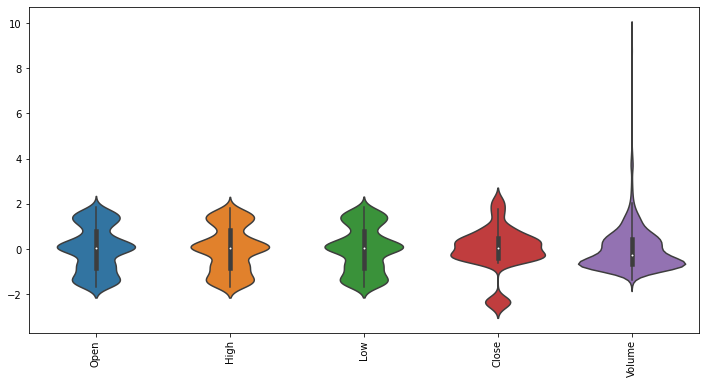

In [17]:
plt.figure(figsize=(12, 6))
ax = sns.violinplot(data=data_cleaned)
_ = ax.set_xticklabels(data_cleaned.keys(), rotation=90)

# Train Test split

## using TimeseriesGenerator

Our target will be Open for action prediction because, at closing time we can't do anything anymore.

the time step is in days and we will leave it like this, We 60 days to predict 1

In [170]:
sampling_rate = 1
sequence_length = 60
stride = 1
batch_size = 32
shuffle = False 

Play with the batch size on the train dataset to see the impact on the RNN model

In [171]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [172]:
train_dataset = TimeseriesGenerator(
    data_cleaned,
    data_cleaned['Open'],
    length = sequence_length,
    sampling_rate = sampling_rate,
    stride = stride,
    start_index=0,
    end_index=num_train_samples,
    shuffle=shuffle,
    batch_size=batch_size
    #batch_size=batch_size*2
)   

#train_dataset[0]

In [173]:
val_dataset = TimeseriesGenerator(
    data_cleaned,
    data_cleaned['Open'],
    length = sequence_length,
    sampling_rate = sampling_rate,
    stride = stride,
    start_index=num_train_samples,
    end_index=num_train_samples + num_val_samples,
    shuffle=shuffle,
    batch_size=batch_size
)   

In [174]:
num_train_samples + num_val_samples

1257

In [175]:
num_test_samples

20

## RNN with timeseriesGenerator 


In [176]:
train_dataset[0][0].shape

(32, 60, 5)

In [177]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense, SimpleRNN,Reshape, LSTM
from tensorflow.keras.preprocessing import timeseries_dataset_from_array
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [178]:
def init_rnn_model(sequence_length, num_features):
    
    model = Sequential()
    model.add(Input(shape=(sequence_length, num_features)))
    model.add(SimpleRNN(16, return_sequences=False, activation='tanh'))
    model.add(Dense(1, activation='linear'))
    
    return model


In [179]:
def compile_and_fit(model, train_dataset, val_dataset, epochs=20):
    

    model.compile(loss='mse', 
              optimizer='rmsprop', 
              metrics=['mae','mean_absolute_percentage_error'])
    
    history = model.fit(train_dataset, epochs=epochs,
                        validation_data=val_dataset,
                        # callbacks=[early_stopping],
                        )
    return history

- batch size 32 on train set and our Metric will be Mae and Mse

In [180]:
rnn_model = init_rnn_model(sequence_length, 5)
history = compile_and_fit(rnn_model, train_dataset,val_dataset)

Epoch 1/20
28/28 [==============================] - 2s 16ms/step - loss: 1.4669 - mae: 0.9320 - mean_absolute_percentage_error: 913.6465 - val_loss: 1.4440 - val_mae: 1.1123 - val_mean_absolute_percentage_error: 79.3332
Epoch 2/20
28/28 [==============================] - 0s 9ms/step - loss: 0.6442 - mae: 0.5963 - mean_absolute_percentage_error: 721.5110 - val_loss: 0.4570 - val_mae: 0.5806 - val_mean_absolute_percentage_error: 40.5671
Epoch 3/20
28/28 [==============================] - 0s 10ms/step - loss: 0.3439 - mae: 0.4129 - mean_absolute_percentage_error: 558.1472 - val_loss: 0.1983 - val_mae: 0.3453 - val_mean_absolute_percentage_error: 24.1027
Epoch 4/20
28/28 [==============================] - 0s 10ms/step - loss: 0.2178 - mae: 0.3175 - mean_absolute_percentage_error: 467.3142 - val_loss: 0.1398 - val_mae: 0.2745 - val_mean_absolute_percentage_error: 19.2675
Epoch 5/20
28/28 [==============================] - 0s 9ms/step - loss: 0.1410 - mae: 0.2488 - mean_absolute_percentage_e

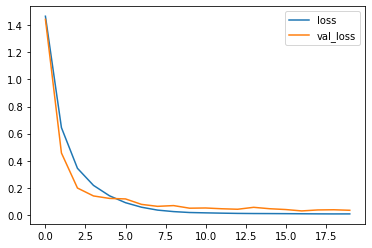

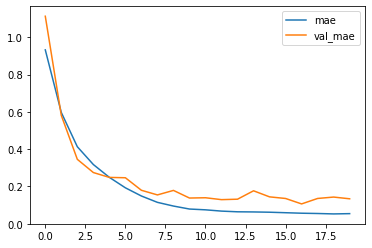

In [181]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

plt.figure(figsize=(6, 4))
plt.plot(history.history['mae'], label='mae')
plt.plot(history.history['val_mae'], label='val_mae')
plt.legend()

Very good results for loss and Mae, Let's try with an LSTM

## LSTM  timeseriesGenerator

In [183]:
def init_lstm_model(sequence_length, num_features):
    
    model = Sequential()
    model.add(Input(shape=(sequence_length, num_features)))
    model.add(LSTM(20, return_sequences=False, activation='tanh'))
    model.add(Dense(1, activation='linear'))
    #model.add(Dense(OUT_STEPS*num_features_y, activation='linear'))
    #model.add(Reshape([OUT_STEPS, num_features_y]))
    
    return model


In [184]:
def compile_and_fit(model, train_dataset, val_dataset, epochs=20):
    

    model.compile(loss='mse', 
              optimizer='rmsprop', 
              metrics=['mae','mean_absolute_percentage_error'])
    
    history_lstm = model.fit(train_dataset, epochs=epochs,
                        validation_data=val_dataset,
                        # callbacks=[early_stopping],
                        )
    return history_lstm

In [185]:
lstm_model = init_lstm_model(sequence_length, 5)
history_lstm = compile_and_fit(lstm_model, train_dataset, val_dataset)

Epoch 1/20
28/28 [==============================] - 3s 34ms/step - loss: 0.3598 - mae: 0.4561 - mean_absolute_percentage_error: 194.8337 - val_loss: 1.6819 - val_mae: 1.2720 - val_mean_absolute_percentage_error: 91.3466
Epoch 2/20
28/28 [==============================] - 0s 16ms/step - loss: 0.0623 - mae: 0.1690 - mean_absolute_percentage_error: 91.0504 - val_loss: 1.1509 - val_mae: 1.0418 - val_mean_absolute_percentage_error: 74.2074
Epoch 3/20
28/28 [==============================] - 0s 16ms/step - loss: 0.0306 - mae: 0.1290 - mean_absolute_percentage_error: 136.9996 - val_loss: 0.9078 - val_mae: 0.9189 - val_mean_absolute_percentage_error: 65.1332
Epoch 4/20
28/28 [==============================] - 0s 16ms/step - loss: 0.0227 - mae: 0.1095 - mean_absolute_percentage_error: 104.2094 - val_loss: 0.7526 - val_mae: 0.8309 - val_mean_absolute_percentage_error: 58.6189
Epoch 5/20
28/28 [==============================] - 0s 15ms/step - loss: 0.0161 - mae: 0.0929 - mean_absolute_percentage_

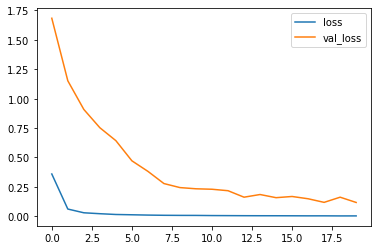

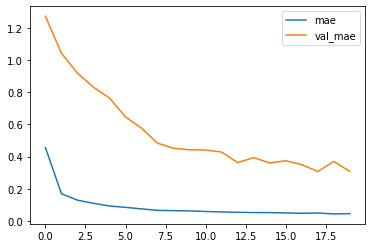

In [186]:
plt.figure(figsize=(6, 4))
plt.plot(history_lstm.history['loss'], label='loss')
plt.plot(history_lstm.history['val_loss'], label='val_loss')
plt.legend()

plt.figure(figsize=(6, 4))
plt.plot(history_lstm.history['mae'], label='mae')
plt.plot(history_lstm.history['val_mae'], label='val_mae')
plt.legend()

We look like underfitting, let's try with a little bit more epochs

## LSTM  timeseriesGenerator Second Iteration

In [187]:
def init_lstm_model(sequence_length, num_features):
    
    model = Sequential()
    model.add(Input(shape=(sequence_length, num_features)))
    model.add(LSTM(20, return_sequences=False, activation='tanh'))
    model.add(Dense(1, activation='linear'))
    #model.add(Dense(OUT_STEPS*num_features_y, activation='linear'))
    #model.add(Reshape([OUT_STEPS, num_features_y]))
    
    return model


In [188]:
def compile_and_fit(model, train_dataset, val_dataset, epochs=20):
    

    model.compile(loss='mse', 
              optimizer='rmsprop', 
              metrics=['mae','mean_absolute_percentage_error'])
    
    history_lstm2 = model.fit(train_dataset, epochs=epochs,
                        validation_data=val_dataset,
                        # callbacks=[early_stopping],
                        )
    return history_lstm2

In [189]:
lstm_model = init_lstm_model(sequence_length, 5)
history_lstm2 = compile_and_fit(lstm_model, train_dataset, val_dataset,epochs=40)

Epoch 1/40
28/28 [==============================] - 3s 34ms/step - loss: 0.1823 - mae: 0.3063 - mean_absolute_percentage_error: 269.8199 - val_loss: 0.5490 - val_mae: 0.7032 - val_mean_absolute_percentage_error: 49.7619
Epoch 2/40
28/28 [==============================] - 1s 18ms/step - loss: 0.0525 - mae: 0.1735 - mean_absolute_percentage_error: 218.9747 - val_loss: 0.5011 - val_mae: 0.6694 - val_mean_absolute_percentage_error: 47.1910
Epoch 3/40
28/28 [==============================] - 0s 17ms/step - loss: 0.0338 - mae: 0.1401 - mean_absolute_percentage_error: 158.3162 - val_loss: 0.4361 - val_mae: 0.6202 - val_mean_absolute_percentage_error: 43.4779
Epoch 4/40
28/28 [==============================] - 1s 19ms/step - loss: 0.0219 - mae: 0.1118 - mean_absolute_percentage_error: 147.3500 - val_loss: 0.4811 - val_mae: 0.6553 - val_mean_absolute_percentage_error: 46.0028
Epoch 5/40
28/28 [==============================] - 1s 18ms/step - loss: 0.0166 - mae: 0.0894 - mean_absolute_percentage

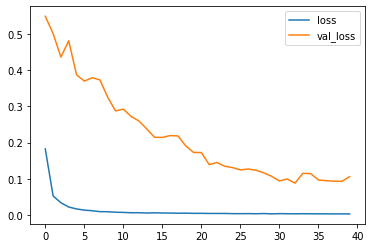

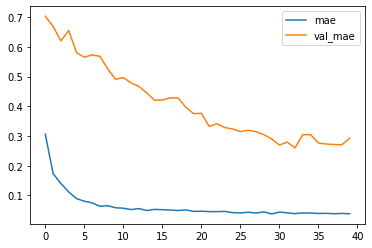

In [190]:
plt.figure(figsize=(6, 4))
plt.plot(history_lstm2.history['loss'], label='loss')
plt.plot(history_lstm2.history['val_loss'], label='val_loss')
plt.legend()

plt.figure(figsize=(6, 4))
plt.plot(history_lstm2.history['mae'], label='mae')
plt.plot(history_lstm2.history['val_mae'], label='val_mae')
plt.legend()

A little bit better Mae but worst Mse, Let's try our test data on our model now

We will apply the same preprocessing as on the training set, We will apply the same preprocessing as on the training set, we concatenate a part of the training data to the test data

In [192]:
train_test_data.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object

In [193]:
# data_y_train = raw_data['Close']
# data_y_test = test_data['Close']

# test_data['Close'] = pd.to_numeric(test_data['Close'].str.replace(r'[,.%]','')).astype(np.float64)
train_test_data['Volume'] = pd.to_numeric(train_test_data['Volume'].str.replace(r'[,.%]','')).astype(np.float64)


C:\Users\Zaiani\AppData\Local\Temp\ipykernel_27492\3094016539.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  train_test_data['Volume'] = pd.to_numeric(train_test_data['Volume'].str.replace(r'[,.%]','')).astype(np.float64)


In [194]:
train_test_data.dtypes


Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

In [195]:
train_test_data

,Date,Open,High,Low,Close,Volume
0,10/6/2016,779.00,780.48,775.54,776.86,1070700.0
1,10/7/2016,779.66,779.66,770.75,775.08,933200.0
2,10/10/2016,777.71,789.38,775.87,785.94,1174900.0
3,10/11/2016,786.66,792.28,780.58,783.07,1372500.0
4,10/12/2016,783.76,788.13,782.06,786.14,937400.0
...,...,...,...,...,...,...
75,1/25/2017,829.62,835.77,825.06,835.67,1494500.0
76,1/26/2017,837.81,838.00,827.01,832.15,2973900.0
77,1/27/2017,834.71,841.95,820.44,823.31,2965800.0
78,1/30/2017,814.66,815.84,799.80,802.32,3246600.0


In [196]:
train_test_data = train_test_data.set_index('Date')

In [197]:
train_test_data

,Open,High,Low,Close,Volume
Date,,,,,
10/6/2016,779.00,780.48,775.54,776.86,1070700.0
10/7/2016,779.66,779.66,770.75,775.08,933200.0
10/10/2016,777.71,789.38,775.87,785.94,1174900.0
10/11/2016,786.66,792.28,780.58,783.07,1372500.0
10/12/2016,783.76,788.13,782.06,786.14,937400.0
...,...,...,...,...,...
1/25/2017,829.62,835.77,825.06,835.67,1494500.0
1/26/2017,837.81,838.00,827.01,832.15,2973900.0
1/27/2017,834.71,841.95,820.44,823.31,2965800.0


In [103]:
train_mean = train_test_data.mean()
train_std = train_test_data.std()

train_test_df = (train_test_data - train_mean) / train_std

In [104]:
train_test_df

,Open,High,Low,Close,Volume
Date,,,,,
10/6/2016,-0.408536,-0.633654,-0.252554,-0.480074,-0.854176
10/7/2016,-0.375610,-0.677086,-0.484555,-0.569281,-1.033844
10/10/2016,-0.472892,-0.162255,-0.236571,-0.025014,-0.718021
10/11/2016,-0.026391,-0.008653,-0.008446,-0.168849,-0.459823
10/12/2016,-0.171067,-0.228463,0.063237,-0.014991,-1.028356
...,...,...,...,...,...
1/25/2017,2.116814,2.294844,2.145910,2.467287,-0.300409
1/26/2017,2.525400,2.412958,2.240357,2.290876,1.632682
1/27/2017,2.370746,2.622174,1.922144,1.847845,1.622098


In [107]:
train_test_df.index = pd.to_datetime(train_test_df.index, format='%m/%d/%Y')

In [139]:
train_test_df

,Open,High,Low,Close,Volume
Date,,,,,
2016-10-06,-0.408536,-0.633654,-0.252554,-0.480074,-0.854176
2016-10-07,-0.375610,-0.677086,-0.484555,-0.569281,-1.033844
2016-10-10,-0.472892,-0.162255,-0.236571,-0.025014,-0.718021
2016-10-11,-0.026391,-0.008653,-0.008446,-0.168849,-0.459823
2016-10-12,-0.171067,-0.228463,0.063237,-0.014991,-1.028356
...,...,...,...,...,...
2017-01-25,2.116814,2.294844,2.145910,2.467287,-0.300409
2017-01-26,2.525400,2.412958,2.240357,2.290876,1.632682
2017-01-27,2.370746,2.622174,1.922144,1.847845,1.622098


In [130]:
sampling_rate_test = 1
sequence_length_test = 60
stride_test = 1
batch_size_test = 32
shuffle_test = False 

In [131]:
num_train_samples + num_val_samples + num_test_samples

1277

In [140]:
# Choosing train, val, test index
num_train_test = len(train_test_df)
print("num_train_test:", num_train_test)

num_train_test: 80


In [146]:
train_generator = TimeseriesGenerator(data=train_test_df, targets=train_test_df['Close'], length=60, start_index=0, end_index=None, shuffle=False, batch_size=1)
for i in range(len(train_generator)):
    x, y = train_generator[i]
    print('%s => %s' % (x, y))

[[[-0.40853602 -0.6336537  -0.25255443 -0.48007374 -0.85417647]
  [-0.37560969 -0.67708593 -0.48455456 -0.56928139 -1.03384388]
  [-0.47289205 -0.16225512 -0.23657112 -0.02501448 -0.71802123]
  [-0.02639096 -0.00865334 -0.00844573 -0.16884929 -0.45982282]
  [-0.17106729 -0.22846279  0.06323699 -0.01499115 -1.02835586]
  [-0.2977838  -0.59445876 -0.37557746 -0.41341858 -0.46923086]
  [-0.27633179 -0.44986122 -0.23027466 -0.39637892 -1.13929232]
  [-0.36862531 -0.34922557 -0.15762327 -0.3247121  -0.82503768]
  [ 0.03297623  0.48552067  0.23324126  0.44207278  0.43446358]
  [ 0.55131659  0.6438894   0.83673222  0.75480073  0.055398  ]
  [ 0.80375184  0.61052074  0.73986369  0.52777227  0.04324595]
  [ 0.38967821  0.37376213  0.64154213  0.64805225 -0.59872207]
  [ 0.88357327  1.20427108  1.16560089  1.33665514 -0.03515438]
  [ 1.4712585   1.28372028  1.18109986  1.06402052 -0.19339237]
  [ 0.95541255  0.7699488   0.75390963  0.63301725 -0.10022665]
  [ 0.68900855  0.585097    0.52045646  

In [148]:
test_dataset = TimeseriesGenerator(
    train_test_df,
    train_test_df['Close'],
    length = sequence_length_test,
    sampling_rate = sampling_rate_test,
    stride = stride_test,
    start_index= 0,
    end_index=None,
    shuffle=shuffle_test,
    batch_size=batch_size_test
    
)   
for i in range(len(test_dataset)):
    x, y = test_dataset[i]
    print('%s => %s' % (x, y))

[[[-0.40853602 -0.6336537  -0.25255443 -0.48007374 -0.85417647]
  [-0.37560969 -0.67708593 -0.48455456 -0.56928139 -1.03384388]
  [-0.47289205 -0.16225512 -0.23657112 -0.02501448 -0.71802123]
  ...
  [ 0.3248233   0.09463062  0.11845205 -0.0696183  -0.74559201]
  [-0.1925193  -0.34498828 -0.08884661 -0.18288195 -1.28067425]
  [-0.22145456 -0.5118316  -0.50102221 -0.7326617   0.05957935]]

 [[-0.37560969 -0.67708593 -0.48455456 -0.56928139 -1.03384388]
  [-0.47289205 -0.16225512 -0.23657112 -0.02501448 -0.71802123]
  [-0.02639096 -0.00865334 -0.00844573 -0.16884929 -0.45982282]
  ...
  [-0.1925193  -0.34498828 -0.08884661 -0.18288195 -1.28067425]
  [-0.22145456 -0.5118316  -0.50102221 -0.7326617   0.05957935]
  [-0.41801482 -0.14901359 -0.23996152 -0.01499115 -0.0876826 ]]

 [[-0.47289205 -0.16225512 -0.23657112 -0.02501448 -0.71802123]
  [-0.02639096 -0.00865334 -0.00844573 -0.16884929 -0.45982282]
  [-0.17106729 -0.22846279  0.06323699 -0.01499115 -1.02835586]
  ...
  [-0.22145456 -0.

In [ ]:
train_test_df = train_test_df.set_index('Date')

c:\Users\Zaiani\Anaconda3\envs\google_forecasting\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


In [149]:
history_lstm.model.predict(test_dataset)

1/1 [==============================] - 0s 123ms/step


array([[-0.31923705],
       [-0.4383178 ],
       [-0.5143211 ],
       [-0.49334067],
       [-0.3881619 ],
       [-0.28232315],
       [-0.1618427 ],
       [-0.08166703],
       [ 0.022066  ],
       [ 0.05360053],
       [ 0.12499601],
       [ 0.12768632],
       [ 0.084355  ],
       [ 0.17738959],
       [ 0.27345088],
       [ 0.3848619 ],
       [ 0.5833429 ],
       [ 0.788832  ],
       [ 0.8501917 ],
       [ 0.79586697]], dtype=float32)

## LSTM  timeseriesGenerator test data

In [367]:
train_dataset = TimeseriesGenerator(
    data_cleaned,
    data_cleaned['Close'],
    length = sequence_length,
    sampling_rate = sampling_rate,
    stride = stride,
    start_index=0,
    end_index=num_train_samples + num_val_samples,
    shuffle=shuffle,
    batch_size=batch_size
    #batch_size=batch_size*2
)   

#train_dataset[0]

In [372]:
def init_lstm_model(sequence_length, num_features):
    
    model = Sequential()
    model.add(Input(shape=(sequence_length, num_features)))
    model.add(LSTM(20, return_sequences=False, activation='tanh'))
    model.add(Dense(1, activation='linear'))
    #model.add(Dense(OUT_STEPS*num_features_y, activation='linear'))
    #model.add(Reshape([OUT_STEPS, num_features_y]))
    
    return model


In [373]:
def compile_and_fit(model, train_dataset, test_dataset, epochs=20):
    

    model.compile(loss='mse', 
              optimizer='rmsprop', 
              metrics=['mae','mean_absolute_percentage_error'])
    
    history = model.fit(train_dataset, epochs=epochs,
                        validation_data=test_dataset,
                        # callbacks=[early_stopping],
                        )
    return history

In [374]:
lstm_model = init_lstm_model(sequence_length, 5)
history = compile_and_fit(lstm_model, train_dataset, test_dataset, epochs=10)

Epoch 1/10
38/38 [==============================] - ETA: 0s - loss: 0.8149 - mae: 0.6064 - mean_absolute_percentage_error: 95.3725

KeyError: 20

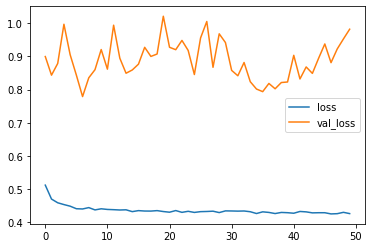

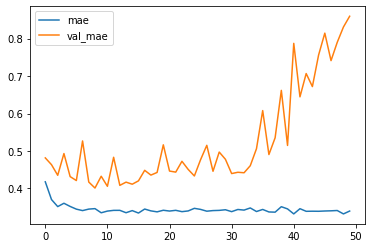

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

plt.figure(figsize=(6, 4))
plt.plot(history.history['mae'], label='mae')
plt.plot(history.history['val_mae'], label='val_mae')
plt.legend()